In [1]:
from sentence_transformers.models import Dense
# GET DATA

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--2025-07-14 11:07:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'

     0K .......... .......... .......... .......... .......... 28% 75.9K 2s
    50K .......... .......... .......... .......... .......... 57%  296K 1s
   100K .......... .......... .......... .......... .......... 86%  390K 0s
   150K .......... .......... ....                            100%  908K=1.0s

2025-07-14 11:07:19 (178 KB/s) - 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv' saved [178509/178509]



In [2]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 
                 parse_dates=["Date"],
                 index_col=["Date"])

df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "price"})

bitcoin_prices

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, 'BTC Price 01-10-2013 to 18-05-2021')

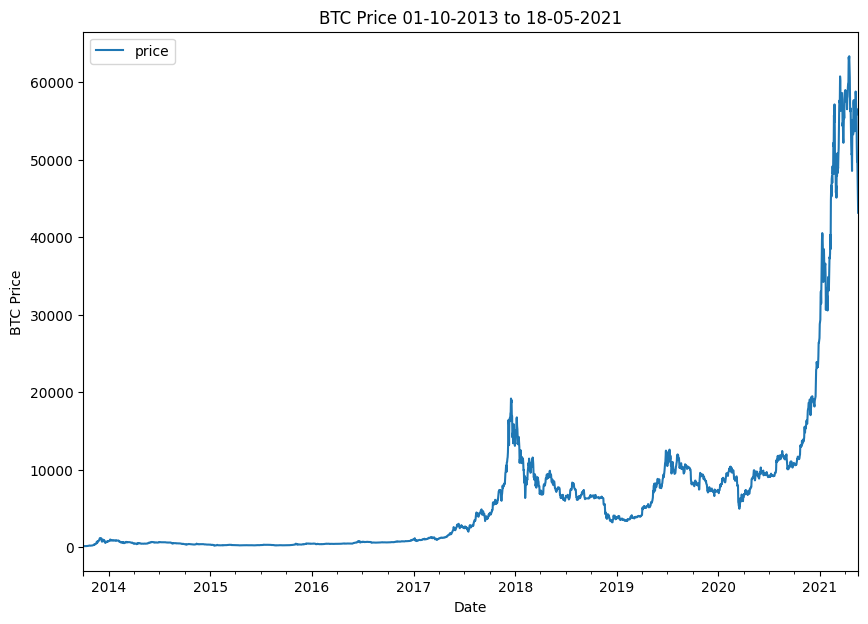

In [4]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("BTC Price 01-10-2013 to 18-05-2021")

In [5]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader, None)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2])) # get the closing price as float
        
# View first 10 of each

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

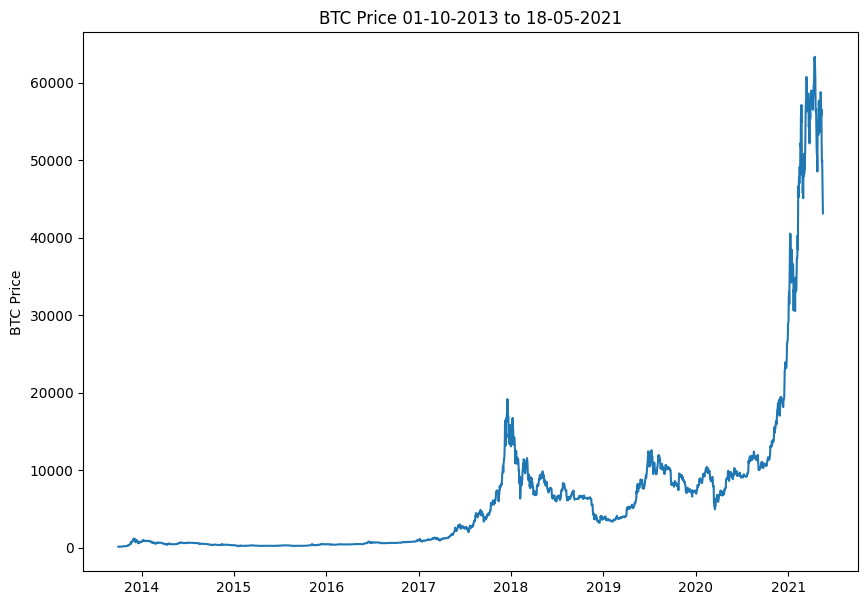

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("BTC Price 01-10-2013 to 18-05-2021")
plt.plot(timesteps, btc_price)

In [7]:
#  WRONG WAY 

timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
#  WRONG WAY 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,  #dates
                                                    prices,  # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

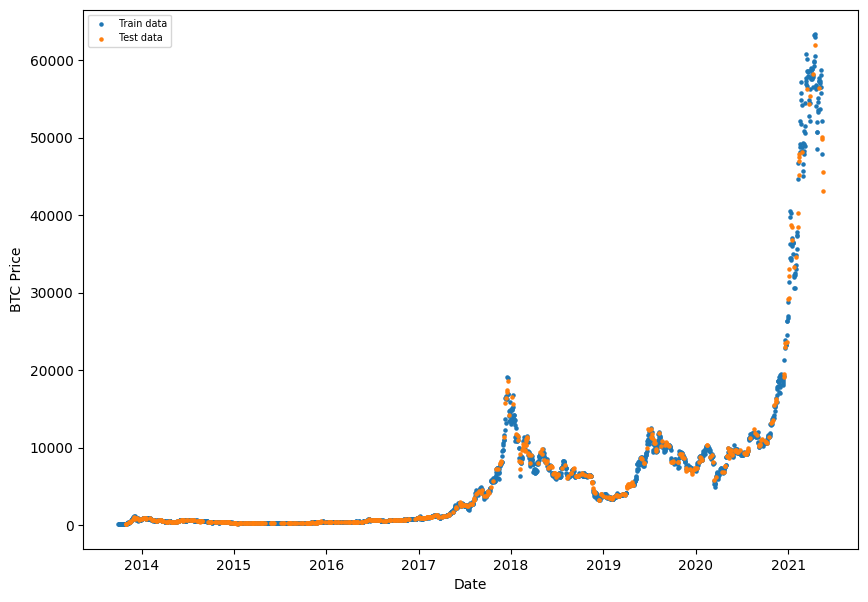

In [9]:
#  WRONG WAY 

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize="x-small")
plt.show()

In [10]:
####
# RIGHT WAY
####

In [11]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

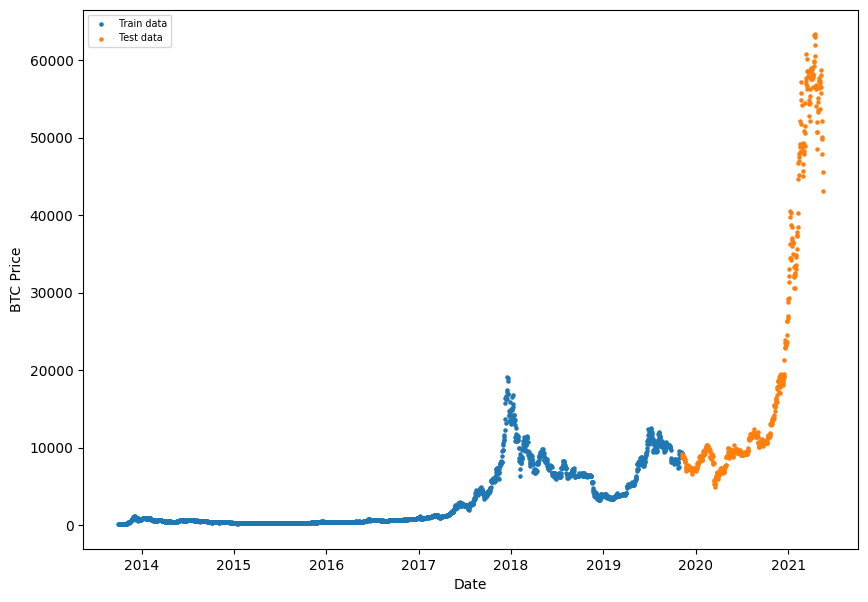

In [12]:
#  WRONG WAY 

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize="x-small")
plt.show()

In [13]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    plots teimesteps (a series of points in ttime against values a series of values across timestmeps) 
     
    :param timesteps: array of timestemp values 
    :param values:  array of values across time
    :param format:  style of plot
    :param start: where to start the plot (setting a value will index from start of timesteps
    :param end:  where to end the plot
    :param label:  where to end the plot
    :return: 
    """
    
    plt.plot(timesteps[start:end], values, format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

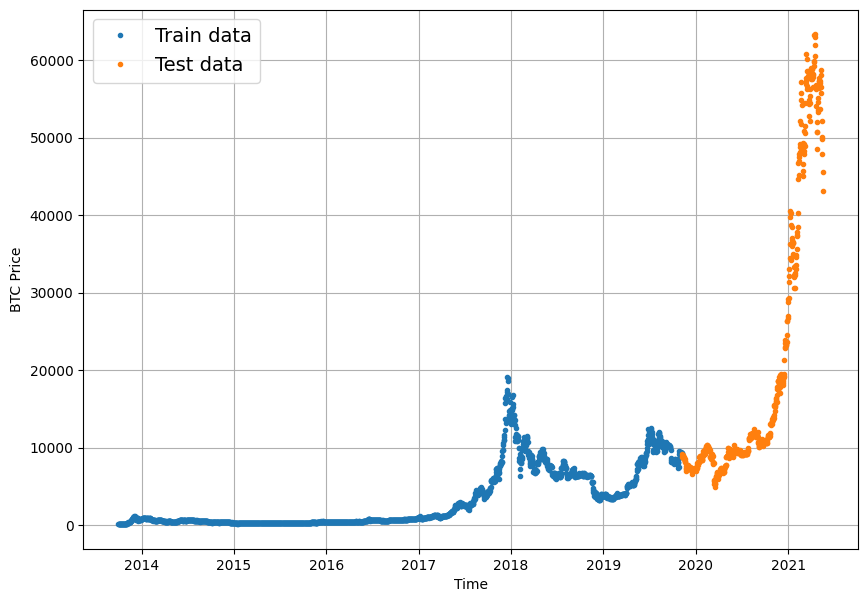

In [14]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Model experiments

* 0. Native model (baseline
* 1. Dense model
* 2. same as 1
* 3. same as 1
* 4. conv1d
* 5. lstm
* 6. same as 1 + multivariate data
* 7. n-beats algorithm
* 8. ensemble
* 9. future prediction model
* 10. same as 1 but with turkey

In [15]:
# Naive forecast

naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

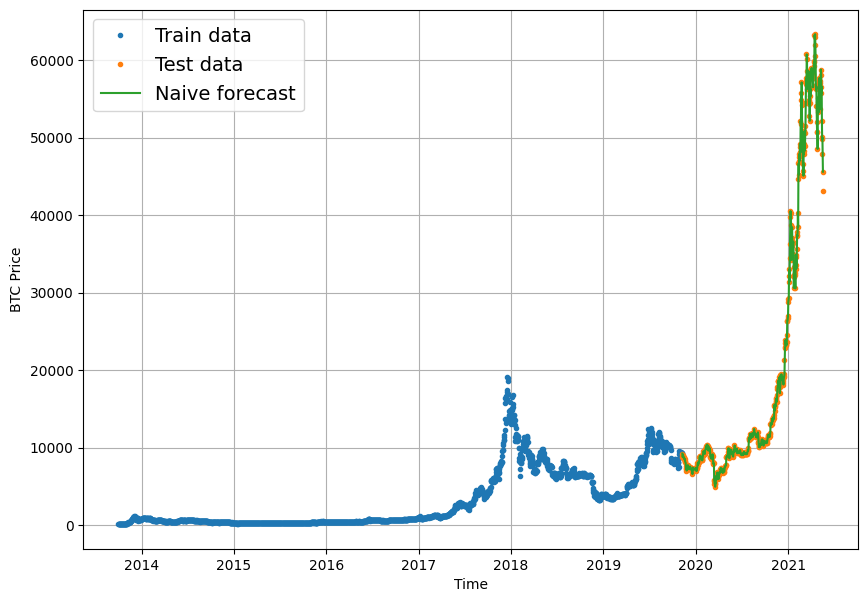

In [16]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

In [17]:
## Evaluating a time series model

import tensorflow as tf

#Mean absolute scale error implementation

def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming not seasonality of data) 
    """
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    return mae / mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred= naive_forecast).numpy()

0.9995699939182624

In [19]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100
    mase = mean_absolute_scaled_error(y_true, y_pred)  # Custom implementation
    
    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy() if isinstance(mase, tf.Tensor) else mase
    }

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [21]:
HORIZON=1
WINDOW_SIZE=7

In [22]:
def get_labelled_window(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.
    e.g. if horizon=1
    input [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [23]:
test_window, test_labels = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_labels

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [24]:
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1d array in a 2d array of sequential labelled windows of window_size with horizon size labels
    """
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(
        np.arange(len(x)-(window_size+horizon-1)), axis=0
    ).T
    
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels
    

In [25]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [26]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [27]:
# NB: tf.keras.preprocessing.timeseries_dataset_from_array() does everything above does 

In [28]:
# make train/test splits

def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Split matching pairs of windows and labels intro train and test splits 
    """
    split_size = int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows,  test_windows, train_labels, test_labels

In [29]:
# make a modelling checkpoint callback

import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    model_name = f"{model_name}.keras"
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              save_best_only=True, 
                                              verbose=0)

In [30]:
## Model 1: Dense model (window=7, horizon=1)
# Dense layer (128, Relu) output with linear activation
# Adam, MAE
# Batch=128 (not 32)
# 100 epochs

In [31]:
train_windows,  test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)

model_1 = Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])



In [33]:
model_1.fit(x=train_windows, 
            y=train_labels, 
            epochs=100, 
            verbose=1, 
            batch_size=128,
            validation_data=(test_windows, test_labels), 
            callbacks=[create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 3242.2424 - mae: 3242.2424 - mse: 26324036.0000 - val_loss: 5567.4614 - val_mae: 5567.4614 - val_mse: 56152204.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 511.4359 - mae: 511.4359 - mse: 881302.1875 - val_loss: 1069.5531 - val_mae: 1069.5531 - val_mse: 3706250.2500
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 201.8189 - mae: 201.8189 - mse: 181599.1719 - val_loss: 1028.4418 - val_mae: 1028.4418 - val_mse: 3477038.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 174.5430 - mae: 174.5430 - mse: 143902.3906 - val_loss: 935.5251 - val_mae: 935.5251 - val_mse: 2898383.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 160.7544 - mae: 160.7544 - mse: 136506.4688 - val_loss: 939.2211 - val_mae: 939.2211 - val_mse: 2822028.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 157.5120 - mae: 157.5120 - mse: 133224.4062 - val_loss: 925.2598 - val_mae: 925.2598

In [34]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 287.7158 - mae: 287.7158 - mse: 346613.0000


[572.3764038085938, 572.3764038085938, 1178491.375]

In [35]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")

model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 282.7345 - mae: 282.7345 - mse: 345500.6250


[566.6270751953125, 566.6270751953125, 1163476.75]

In [36]:
## making forecasts with a model
def make_preds(model, input_data):
    """
    uses model to make prediction on input_Data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [37]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8839.921, 8778.882, 9009.665, 8766.98 , 8733.726, 8708.618,
        8655.311, 8523.093, 8438.238, 8507.513], dtype=float32)>)

In [38]:
tf.squeeze(test_labels.shape), model_1_preds.shape

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([556,   1])>,
 TensorShape([556]))

In [39]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 566.6271,
 'mse': 1163476.8,
 'rmse': 1078.6458,
 'mape': 2.5434737,
 'mase': 0.9954068}

In [40]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

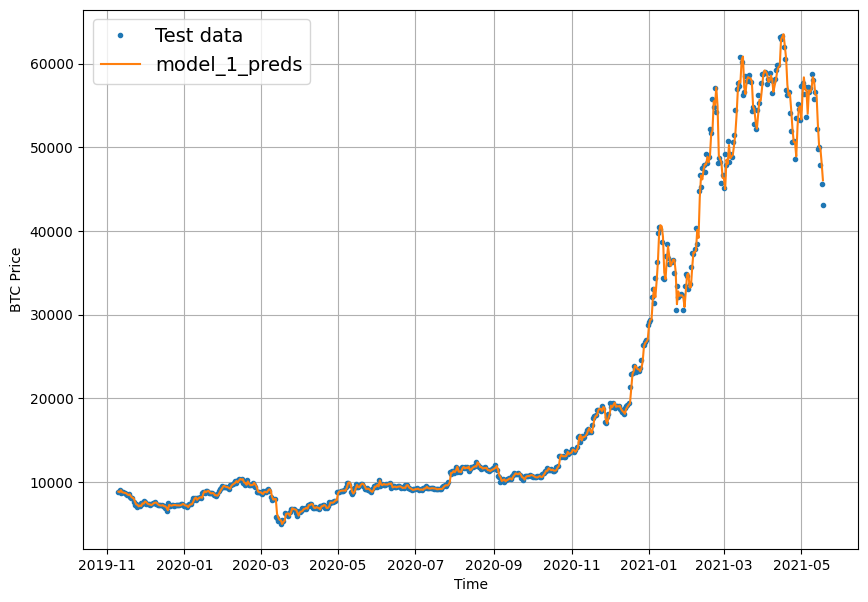

In [41]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 format="-",
                 label="model_1_preds")

##### SAME BUT WINDOW IS 30

In [42]:
WINDOW30 = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW30, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

In [43]:
model_2 = Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [44]:
model_2.fit(x=train_windows, 
            y=train_labels, 
            epochs=100, 
            verbose=0, 
            batch_size=128,
            validation_data=(test_windows, test_labels), 
            callbacks=[create_model_checkpoint(model_name = model_2.name)])

In [45]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 312.5161 - mae: 312.5161 - mse: 369590.4688


[603.4269409179688, 603.4269409179688, 1246885.375]

In [46]:
model_2_preds = make_preds(model_2, 
                           input_data=test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [47]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': 603.42694,
 'mse': 1246885.4,
 'rmse': 1116.6403,
 'mape': 2.7827702,
 'mase': 1.0547961}

In [48]:
model_1_results

{'mae': 566.6271,
 'mse': 1163476.8,
 'rmse': 1078.6458,
 'mape': 2.5434737,
 'mase': 0.9954068}

In [ ]:
# conv1d

In [49]:
WINDOW_SIZE = 7
HORIZON = 1

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON) 

In [50]:
len(full_windows)

2780

In [52]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows)

2224

In [60]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))

In [61]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]
